## @ Author Mohammed
### Data storyt Telling - FACEBOOK AND THE CAMBRIDGE ANALYTICA SCAM
#### Date 28/04/2018

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk.corpus as corpus
import nltk

from bokeh.layouts import layout
from bokeh.layouts import widgetbox

from bokeh.embed import file_html

from bokeh.io import show
from bokeh.io import output_notebook 

from bokeh.models import Text
from bokeh.models import Plot
from bokeh.models import Slider
from bokeh.models import Circle
from bokeh.models import Range1d
from bokeh.models import CustomJS
from bokeh.models import HoverTool
from bokeh.models import LinearAxis
from bokeh.models import ColumnDataSource
from bokeh.models import SingleIntervalTicker
from bokeh.charts import Line
from bokeh.plotting import figure

from bokeh.palettes import Spectral6
from bokeh.charts import Bar

output_notebook()
%matplotlib inline

Loading BokehJS ...

In [47]:
df=pd.read_csv('mark.csv')

In [48]:
df.shape

(858, 2)

In [49]:
df.head()

,Person,Text
0,GRASSLEY:,I'll start with you.\n\nFacebook handles exte...
1,ZUCKERBERG:,"Mr. Chairman, thank you.\n\nAs I mentioned, w..."
2,GRASSLEY:,OK (ph).\n\nHave you ever required an audit t...
3,ZUCKERBERG:,"Mr. Chairman, yes we have. I don't have the e..."
4,GRASSLEY:,"I was going to assume that, sitting here toda..."


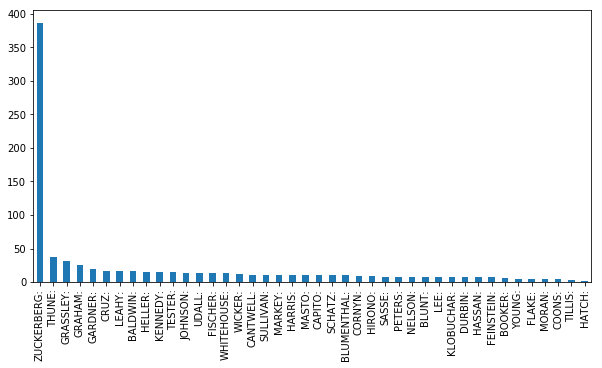

In [50]:
plt.figure(figsize=(10,5))
df['Person'].value_counts().plot.bar()

In [51]:
def get_count(x):
    return len(nltk.word_tokenize(x))
df['len']=df['Text'].map(get_count)

In [52]:
df.head()

,Person,Text,len
0,GRASSLEY:,I'll start with you.\n\nFacebook handles exte...,139
1,ZUCKERBERG:,"Mr. Chairman, thank you.\n\nAs I mentioned, w...",166
2,GRASSLEY:,OK (ph).\n\nHave you ever required an audit t...,29
3,ZUCKERBERG:,"Mr. Chairman, yes we have. I don't have the e...",143
4,GRASSLEY:,"I was going to assume that, sitting here toda...",55


In [53]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [54]:
ENGLISH_STOP_WORDS = frozenset([
    "a", "about", "above", "across", "after", "afterwards", "again", "against",
    "all", "almost", "alone", "along", "already", "also", "although", "always",
    "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
    "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are",
    "around", "as", "at", "back", "be", "became", "because", "become",
    "becomes", "becoming", "been", "before", "beforehand", "behind", "being",
    "below", "beside", "besides", "between", "beyond", "bill", "both",
    "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con",
    "could", "couldnt", "cry", "de", "describe", "detail", "do", "done",
    "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else",
    "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
    "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill",
    "find", "fire", "first", "five", "for", "former", "formerly", "forty",
    "found", "four", "from", "front", "full", "further", "get", "give", "go",
    "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter",
    "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his",
    "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed",
    "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter",
    "latterly", "least", "less", "ltd", "made", "many", "may", "me",
    "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly",
    "move", "much", "must", "my", "myself", "name", "namely", "neither",
    "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone",
    "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on",
    "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our",
    "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps",
    "please", "put", "rather", "re", "same", "see", "seem", "seemed",
    "seeming", "seems", "serious", "several", "she", "should", "show", "side",
    "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone",
    "something", "sometime", "sometimes", "somewhere", "still", "such",
    "system", "take", "ten", "than", "that", "the", "their", "them",
    "themselves", "then", "thence", "there", "thereafter", "thereby",
    "therefore", "therein", "thereupon", "these", "they", "thick", "thin",
    "third", "this", "those", "though", "three", "through", "throughout",
    "thru", "thus", "to", "together", "too", "top", "toward", "towards",
    "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us",
    "very", "via", "was", "we", "well", "were", "what", "whatever", "when",
    "whence", "whenever", "where", "whereafter", "whereas", "whereby",
    "wherein", "whereupon", "wherever", "whether", "which", "while", "whither",
    "who", "whoever", "whole", "whom", "whose", "why", "will", "with",
    "within", "without", "would", "yet", "you", "your", "yours", "yourself",
    "yourselves","thank","you","mr","zuckerberg","chairman"])

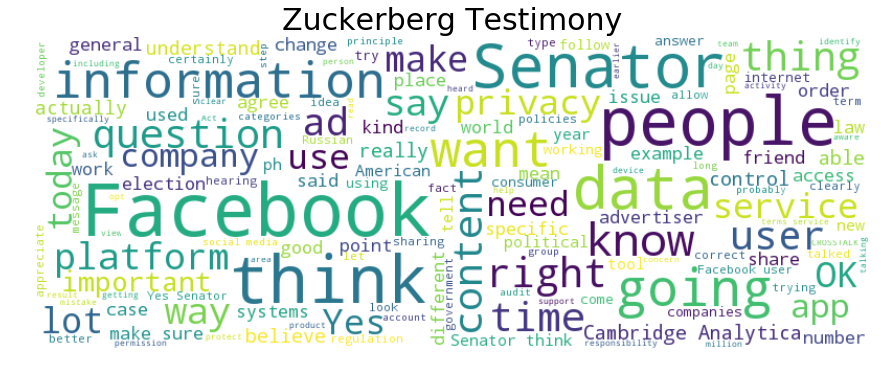

In [55]:
stopwords=set(STOPWORDS).union(ENGLISH_STOP_WORDS)
#alice_mask = np.array(Image.open("../input/fbmask/fbmask.png"))
names = df["Text"]
#print(names)
wordcloud = WordCloud(max_words=150,stopwords=stopwords,max_font_size=70, width=800, height=300,#mask=alice_mask,
                      background_color ="white").generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.title("Zuckerberg Testimony", fontsize=30)
plt.axis("off")
plt.savefig("ZuckerbergTestimony.png",dpi=600)
plt.savefig('WordCloud.jpg')
plt.show()

In [56]:
print("The total words spoken by Mark were {} words".format(df.query("Person=='ZUCKERBERG:'")['len'].sum()))
print("The average length of his response was {} words".format(round(df.query("Person=='ZUCKERBERG:'")['len'].mean(),2)))
print("The maximum length of Mark's response was {} words".format(df.query("Person=='ZUCKERBERG:'")['len'].max()))

The total words spoken by Mark were 19959 words
The average length of his response was 51.71 words
The maximum length of Mark's response was 524 words


In [57]:
a=df.query("Person !='ZUCKERBERG:'").groupby("Person").sum().rename(columns={'len':'Total Words'}).sort_values("Total Words",ascending=False).head(20)
a.index.astype(list)

Index(['GRASSLEY:', 'THUNE:', 'TILLIS:', 'MASTO:', 'BOOKER:', 'FISCHER:',
       'TESTER:', 'SULLIVAN:', 'HASSAN:', 'PETERS:', 'GARDNER:', 'MARKEY:',
       'KENNEDY:', 'HIRONO:', 'CAPITO:', 'SASSE:', 'GRAHAM:', 'HARRIS:',
       'BALDWIN:', 'YOUNG:'],
      dtype='object', name='Person')

In [58]:
xdr = ['GRASSLEY', 'THUNE', 'TILLIS', 'MASTO', 'BOOKER', 'FISCHER',
       'TESTER', 'SULLIVAN', 'HASSAN', 'PETERS', 'GARDNER', 'MARKEY',
       'KENNEDY', 'HIRONO', 'CAPITO', 'SASSE', 'GRAHAM', 'HARRIS',
       'BALDWIN', 'YOUNG']
ydr = Range1d(100, 2000)
plot = figure(
    x_range=xdr,
    y_range=ydr,
    plot_width=1100,
    plot_height=500,
    outline_line_color=None,
    toolbar_location=None, 
    min_border=20,
    x_axis_label='Senators' ,
    y_axis_label='Words Spoken'
)

plot.vbar(x=xdr,top=a['Total Words'],width=1,line_color="white",fill_color='#0000B2')
show(plot)

In [14]:
from bokeh.charts import output_file
output_file("WhichSenatorSpokeThemost.html")
show(plot)

#### Restart Kernel after this

In [59]:
from sklearn.feature_extraction import text
def get_imp(bow,mf,ngram):
    tfidf=text.CountVectorizer(bow,ngram_range=(ngram,ngram),max_features=mf,stop_words=ENGLISH_STOP_WORDS)
    matrix=tfidf.fit_transform(bow)
    return pd.Series(np.array(matrix.sum(axis=0))[0],index=tfidf.get_feature_names()).sort_values(ascending=False).head(100)

#### What is mark telling the senate and the world

In [60]:
mark=df[df['Person']=="ZUCKERBERG:"]['Text'].tolist()
a=get_imp(mark,mf=5000,ngram=3).head(10).sort_values(ascending=True)
a.index

Index(['single app access', 'sign app bring', 'working security content',
       'going 20 000', 'foreign interference elections', 'app access large',
       'security content review', 'senator don know', '20 000 people',
       'want make sure'],
      dtype='object')

In [61]:
xdr = ['single app access', 'sign app bring', 'working security content',
       'going 20 000', 'foreign interference elections', 'app access large',
       'security content review', 'senator don know', '20 000 people',
       'want make sure']
ydr = Range1d(0, 8)
plot2 = figure(
    x_range=ydr,
    y_range=xdr,
    plot_width=700,
    plot_height=500,
    outline_line_color=None,
    toolbar_location=None, 
    min_border=20,
    x_axis_label='Number of times' ,
    y_axis_label='What Mark Said in 3 words'
)

plot2.hbar(right=a.values,y=xdr,height=0.7,line_color="white",fill_color='#0000B2')
show(plot2)

In [62]:
from bokeh.charts import output_file
output_file("WhatMarkSaidIn3.html")
show(plot2)

In [63]:
a=get_imp(mark,mf=5000,ngram=2).head(10).sort_values(ascending=True)
a.index

Index(['app developer', 'team follow', 'making sure', 'don know',
       'senator don', 'senator yes', 'cambridge analytica', 'yes senator',
       'senator think', 'make sure'],
      dtype='object')

In [64]:
xdr = ['app developer', 'team follow', 'making sure', 'don know',
       'senator don', 'senator yes', 'cambridge analytica', 'yes senator',
       'senator think', 'make sure']
ydr = Range1d(0, 40)
plot3 = figure(
    x_range=ydr,
    y_range=xdr,
    plot_width=700,
    plot_height=500,
    outline_line_color=None,
    toolbar_location=None, 
    min_border=20,
    x_axis_label='Number of times' ,
    y_axis_label='What Mark Said in 2 words'
)

plot3.hbar(right=a.values,y=xdr,height=0.7,line_color="white",fill_color='#0000B2')
show(plot3)

In [65]:
from bokeh.charts import output_file
output_file("WhatMarkSaidIn2.html")
show(plot3)

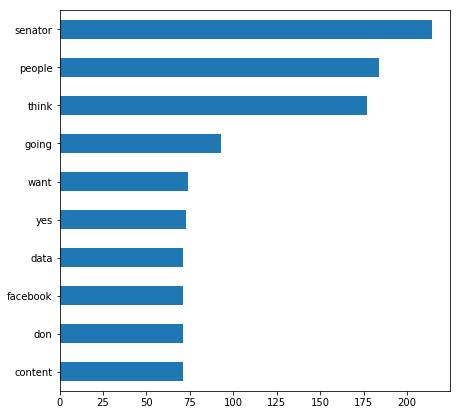

In [16]:
get_imp(mark,mf=5000,ngram=1).head(10).sort_values(ascending=True).plot(kind="barh",figsize=(7,7))

#### Senator Grassley spoke a lot

In [15]:
w=df[df['Person']=="GRASSLEY:"]['Text'].tolist()
a=get_imp(w,mf=5000,ngram=3).head(10).sort_values(ascending=True)
a.index

Index(['year did actively', 'gave keys didn', 'friends policy does',
       'free involves trade', 'foundation internet economy',
       'force chair said', 'senator wicker senator',
       'privacy protections consumers', 'don charge access',
       'entire internet ecosystem'],
      dtype='object')

In [48]:
xdr = ['year did actively', 'gave keys didn', 'friends policy does',
       'free involves trade', 'foundation internet economy',
       'force chair said', 'senator wicker senator',
       'privacy protections consumers', 'don charge access',
       'entire internet ecosystem']
ydr = Range1d(0, 3)
plot4 = figure(
    x_range=ydr,
    y_range=xdr,
    plot_width=1100,
    plot_height=500,
    outline_line_color=None,
    toolbar_location=None, 
    min_border=20,
    x_axis_label='Number of times' ,
    y_axis_label='What Senator Grassley Said in 2 words'
)

plot4.hbar(right=a.values,y=xdr,height=1,line_color="white",fill_color='#0000B2')
show(plot4)

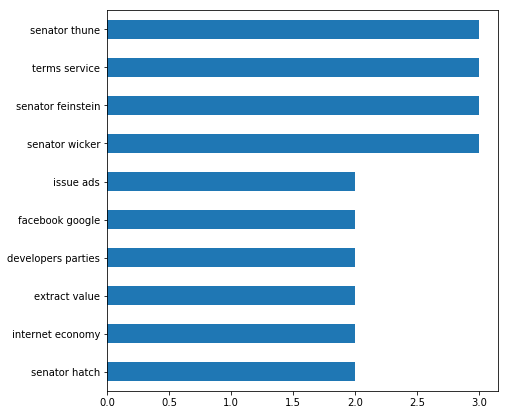

In [49]:
get_imp(w,mf=5000,ngram=2).head(10).sort_values(ascending=True).plot(kind="barh",figsize=(7,7))

#### In Combination what do all senators want to say!!!!

In [66]:
S=df[(df['Person']=="CRUZ:")|(df['Person']=="WHITEHOUSE:")|(df['Person']=="WHITEHOUSE:")|(df['Person']=="SCHATZ:")|(df['Person']=="COONS:")|(df['Person']=="JOHNSON:")|(df['Person']=="DURBIN:")|(df['Person']=="UDALL:")|(df['Person']=="CANTWELL:")|(df['Person']=="HELLER:")|(df['Person']=="CORNYN:")|(df['Person']=="LEAHY:")|(df['Person']=="LEE:")|(df['Person']=="KLOBUCHAR:")|(df['Person']=="BLUNT:")|(df['Person']=="FLAKE:")|(df['Person']=="MORAN:")|(df['Person']=="NELSON:")|(df['Person']=="WICKER:")|(df['Person']=="FEINSTEIN:")|(df['Person']=="HATCH:")]['Text'].tolist()
a=get_imp(S,mf=5000,ngram=5).head(10).sort_values(ascending=True)
a.index

Index(['zimbabwe just days ago met', 'facebook today guess people say',
       'facebook tech companies engaged pervasive',
       'facebook taken midday left worried',
       'facebook social media platforms neutral',
       'facebook share data does developer',
       'facebook sent notification 87 million',
       'facebook said strict limits information', '15 000 20 000 people',
       'sorts legislative changes help solve'],
      dtype='object')

In [19]:
xdr = ['zimbabwe just days ago met', 'facebook today guess people say',
       'facebook tech companies engaged pervasive',
       'facebook taken midday left worried',
       'facebook social media platforms neutral',
       'facebook share data does developer',
       'facebook sent notification 87 million',
       'facebook said strict limits information', '15 000 20 000 people',
       'sorts legislative changes help solve']
ydr = Range1d(0, 3)
plot5 = figure(
    x_range=ydr,
    y_range=xdr,
    plot_width=700,
    plot_height=500,
    outline_line_color=None,
    toolbar_location=None, 
    min_border=20,
    x_axis_label='Number of times' ,
    y_axis_label='What all Senators Said in 5 words'
)

plot5.hbar(right=a.values,y=xdr,height=0.7,line_color="white",fill_color='#0000B2')
show(plot5)

In [74]:
a=get_imp(S,mf=5000,ngram=3).head(10).sort_values(ascending=True)
a.index

Index(['want changes law', 'total information awareness',
       '87 million facebook', 'campaign cambridge analytica',
       '87 million users', 'decisions based political', 'going come strong',
       'bug bounty program', '20 000 people', 'neutral public forum'],
      dtype='object')

In [75]:
xdr = ['want changes law', 'total information awareness',
       '87 million facebook', 'campaign cambridge analytica',
       '87 million users', 'decisions based political', 'going come strong',
       'bug bounty program', '20 000 people', 'neutral public forum']
ydr = Range1d(0, 5)
plot6 = figure(
    x_range=ydr,
    y_range=xdr,
    plot_width=700,
    plot_height=500,
    outline_line_color=None,
    toolbar_location=None, 
    min_border=20,
    x_axis_label='Number of times' ,
    y_axis_label='What all Senators Said in 3 words'
)

plot6.hbar(right=a.values,y=xdr,height=0.7,line_color="white",fill_color='#0000B2')
show(plot6)

In [70]:
from bokeh.charts import output_file
output_file("WhatSenatorsSaidin3.html")
show(plot6)

In [76]:
a=get_imp(S,mf=5000,ngram=2).head(10).sort_values(ascending=True)
a.index

Index(['access data', 'business model', '000 people', 'don want', 'make sure',
       'social media', 'terms service', '87 million', 'facebook users',
       'cambridge analytica'],
      dtype='object')

In [77]:
xdr = ['access data', 'business model', '000 people', 'don want', 'make sure',
       'social media', 'terms service', '87 million', 'facebook users',
       'cambridge analytica']
ydr = Range1d(0, 20)
plot7 = figure(
    x_range=ydr,
    y_range=xdr,
    plot_width=700,
    plot_height=500,
    outline_line_color=None,
    toolbar_location=None, 
    min_border=20,
    x_axis_label='Number of times' ,
    y_axis_label='What all Senators Said in 2 words'
)

plot7.hbar(right=a.values,y=xdr,height=0.7,line_color="white",fill_color='#0000B2')
output_file("WhatSenatorsSaidin2.html")
show(plot7)

In [73]:
from bokeh.charts import output_file
output_file("WhatSenatorsSaidin2.html")
show(plot7)

#### Sentiment Analysis

In [79]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [80]:
analize_sentiment(df['Text'].iloc[0])

1

In [81]:
clean_tweet(df['Text'].iloc[0])

'I ll start with you Facebook handles extensive amounts of personal data for billions of users A significant amount of that data is shared with third party developers who utilize your platform As of this early this year you did not actively monitor whether that data was transferred by such developers to other parties Moreover your policies only prohibit transfers by developers to parties seeking to profit from such data Number one besides Professor Kogan s transfer and now potentially Cubeyou do you know of any instances where user data was improperly transferred to third party in breach of Facebook s terms If so how many times has that happened and was Facebook only made aware of that transfer by some third party'

In [82]:
df.shape

(858, 3)

In [83]:
df['sentiment']="Other"
for i in range(0,853):
    analysis = TextBlob(clean_tweet(df['Text'].iloc[i]))
    if analysis.sentiment.polarity > 0:
        df['sentiment'].iloc[i]='Positive'
    elif analysis.sentiment.polarity == 0:
        df['sentiment'].iloc[i]='Negative'
    else:
        df['sentiment'].iloc[i]='Neutral'

C:\Users\moham\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [84]:
df['sentiment'].value_counts()

Positive    439
Negative    319
Neutral      95
Other         5
Name: sentiment, dtype: int64

In [85]:
df["Text"].loc[df['sentiment']=='Negative'][68]

" So they may have been involved and all working together during that time period? Maybe that's something your investigation will find out.\n\n"

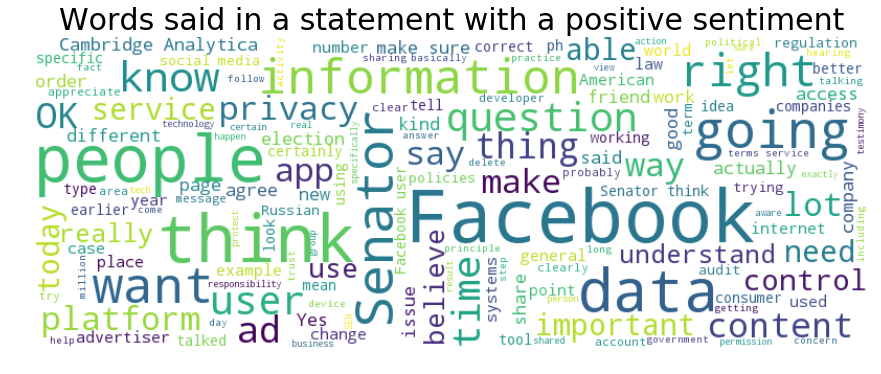

In [72]:
stopwords=set(STOPWORDS).union(ENGLISH_STOP_WORDS).union('senator')
#alice_mask = np.array(Image.open("../input/fbmask/fbmask.png"))
names = df["Text"].loc[df['sentiment']=='Positive']
#print(names)
wordcloud = WordCloud(max_words=150,stopwords=stopwords,max_font_size=70, width=800, height=300,#mask=alice_mask,
                      background_color ="white").generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.title("Words said in a statement with a positive sentiment", fontsize=30)
plt.axis("off")
plt.savefig("mark",dpi=600)
plt.show()

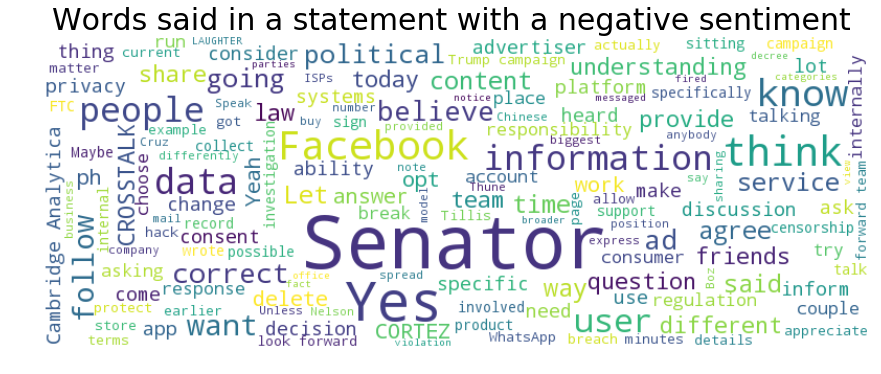

In [104]:
stopwords=set(STOPWORDS).union(ENGLISH_STOP_WORDS).union('Senator')
#alice_mask = np.array(Image.open("../input/fbmask/fbmask.png"))
names = df["Text"].loc[df['sentiment']=='Negative']
#print(names)
wordcloud = WordCloud(max_words=150,stopwords=stopwords,max_font_size=70, width=800, height=300,#mask=alice_mask,
                      background_color ="white").generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.title("Words said in a statement with a negative sentiment", fontsize=30)
plt.axis("off")
plt.savefig("mark",dpi=600)
plt.show()

In [87]:
ndf=df.loc[df['sentiment']=='Negative']
S=ndf[(ndf['Person']=="CRUZ:")|(ndf['Person']=="WHITEHOUSE:")|(ndf['Person']=="WHITEHOUSE:")|(ndf['Person']=="SCHATZ:")|(ndf['Person']=="COONS:")|(ndf['Person']=="JOHNSON:")|(ndf['Person']=="DURBIN:")|(ndf['Person']=="UDALL:")|(ndf['Person']=="CANTWELL:")|(ndf['Person']=="HELLER:")|(ndf['Person']=="CORNYN:")|(ndf['Person']=="LEAHY:")|(ndf['Person']=="LEE:")|(ndf['Person']=="KLOBUCHAR:")|(ndf['Person']=="BLUNT:")|(ndf['Person']=="FLAKE:")|(ndf['Person']=="MORAN:")|(ndf['Person']=="NELSON:")|(ndf['Person']=="WICKER:")|(ndf['Person']=="FEINSTEIN:")|(ndf['Person']=="HATCH:")]['Text']

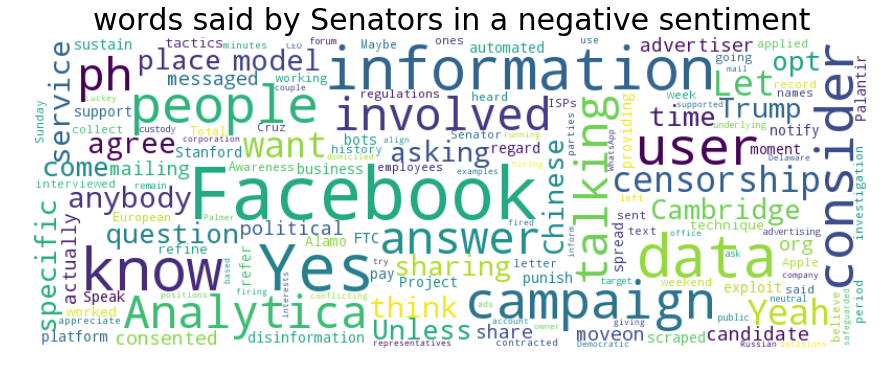

In [89]:
stopwords=set(STOPWORDS).union(ENGLISH_STOP_WORDS)
#alice_mask = np.array(Image.open("../input/fbmask/fbmask.png"))
names = S
#print(names)
wordcloud = WordCloud(max_words=150,stopwords=stopwords,max_font_size=70, width=800, height=300,#mask=alice_mask,
                      background_color ="white").generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.title("words said by Senators in a negative sentiment", fontsize=30)
plt.axis("off")
plt.savefig("negSentimentSenators.png",dpi=600)
plt.show()